Praca domowa 1 (8 pkt.)
Termin: 25.03.2021 (przed zajęciami)

Dla wybranego modelu z projektu przygotuj knitr/jupyter notebook w formacie html lub pdf rozwiązując poniższe punkty.

    Dla wybranej obserwacji ze zbioru danych wylicz predykcję modelu.
    Dla wybranej obserwacji z punktu 1., wylicz dekompozycję predykcji modelu używając SHAP, Break Down lub obie (pakiety w R: DALEX, iml, pakiety w Python: shap, dalex, piBreakDown).
    Wybierz dwie obserwacje ze zbioru danych, które mają inne najważniejsze zmienne (na przykład: dla obserwacji A ważne zmienne to wiek i płeć, a dla obserwacji B klasa i rasa).
    Znajdź dwie obserwacje ze zbioru danych, które mają dla tych samych zmiennych inne efekty (pozytywny i negatywny).
    Skomentuj poszczególne wyniki uzyskane w powyższych punktach.

W pracy domowej oceniane przede wszystkim będą wnioski z otrzymanych analiz. Kod potrzebny do reprodukowalności wyników również proszę załączyć.

Prace domowe należy zgłaszać przez Pull Request o tytule Nazwisko Imię PD1. Wszystkie pliki związane z pracą domową proszę o umieszczenie w folderze PraceDomowe/PracaDomowa1/Nazwisko_Imię.

In [1]:
library(OpenML)
library(mlr)
library(pROC)
library(plyr)

set.seed(4)

Warning message:
"package 'OpenML' was built under R version 4.0.4"
Warning message:
"package 'mlr' was built under R version 4.0.4"
Loading required package: ParamHelpers

Warning message:
"package 'ParamHelpers' was built under R version 4.0.4"
Warning message: 'mlr' is in 'maintenance-only' mode since July 2019.
Future development will only happen in 'mlr3'
(<https://mlr3.mlr-org.com>). Due to the focus on 'mlr3' there might be
uncaught bugs meanwhile in {mlr} - please consider switching.

Warning message:
"package 'pROC' was built under R version 4.0.4"
Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var


Warning message:
"package 'plyr' was built under R version 4.0.4"


In [2]:
def <- getOMLDataSet(data.id = 37)
def <- def$data
def$class <- mapvalues(def$class, 
          from=c("tested_positive","tested_negative"), 
          to=c(1,0))
head(def)



Loading required package: readr



,preg,plas,pres,skin,insu,mass,pedi,age,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [3]:
summary(def)

      preg             plas            pres             skin      
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
      insu            mass            pedi             age        class  
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00   0:500  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00   1:268  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00          
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24          
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00          
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00          

In [4]:
m <- sample(1:nrow(def), 0.7*nrow(def))
train <- def[m,]
test <- def[-m,]

In [5]:
classif_task <- makeClassifTask(id = "lvr", data = train, target = "class")

classif_lrn <- makeLearner("classif.ranger", par.vals = list(num.trees = 131, mtry = 3), predict.type = "prob")

In [6]:
model <- train(classif_lrn, classif_task)

# Dla wybranej obserwacji ze zbioru danych wylicz predykcję modelu.

In [7]:
r <- test[sample(1:nrow(test), 1),]
r

,preg,plas,pres,skin,insu,mass,pedi,age,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
553,1,88,62,24,44,29.9,0.422,23,0


In [8]:
pred_r <- predict(model, newdata = r)$data$prob.0
pred_r
# Dobrze przewiduje model ten rekord

[1] 0.9896098

# Dla wybranej obserwacji z punktu 1., wylicz dekompozycję predykcji modelu używając SHAP, Break Down lub obie

In [9]:
library(DALEX)
library(DALEXtra)

Welcome to DALEX (version: 2.0.1).
Find examples and detailed introduction at: https://pbiecek.github.io/ema/


Warning message:
"package 'DALEXtra' was built under R version 4.0.4"
Anaconda not found on your computer. Conda related functionality such as create_env.R and condaenv and yml parameters from explain_scikitlearn will not be available



In [10]:
explainer <- explain(model = model,
                     data = def[,-9],
                     y = as.numeric(as.character(def$class)))

Preparation of a new explainer is initiated
  -> model label       :  WrappedModel  (  default  )
  -> data              :  768  rows  8  cols 
  -> target variable   :  768  values 
  -> predict function  :  yhat.WrappedModel  will be used (  default  )
  -> predicted values  :  numerical, min =  0 , mean =  0.3530395 , max =  0.9794953  
  -> model_info        :  package mlr , ver. 2.19.0 , task classification (  default  ) 
  -> residual function :  difference between y and yhat (  default  )
  -> residuals         :  numerical, min =  -0.8907064 , mean =  -0.004081178 , max =  0.943984  
  A new explainer has been created!  


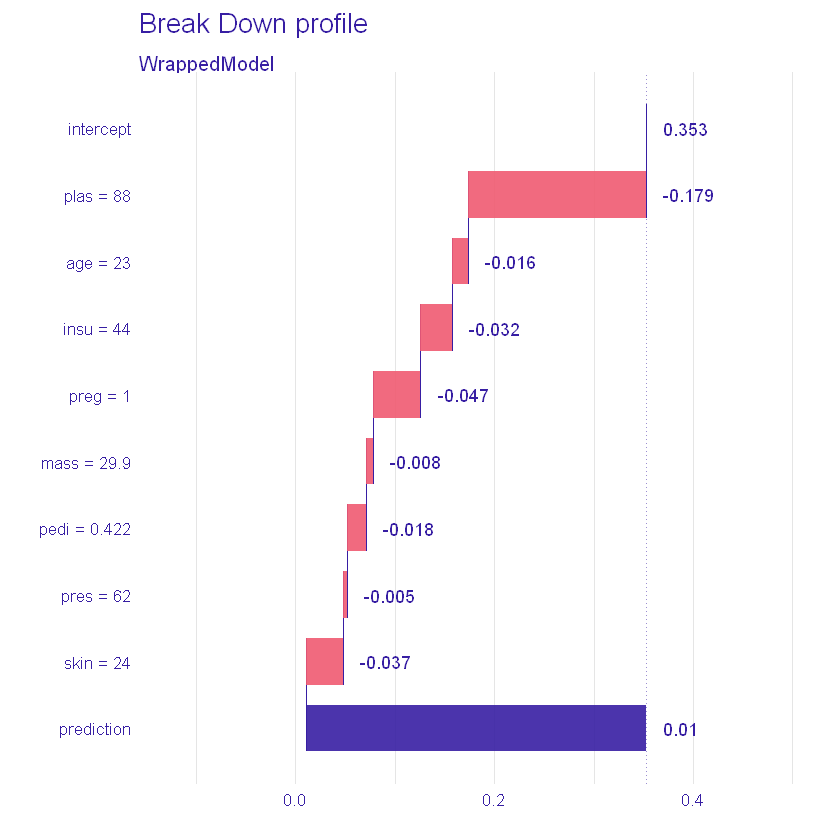

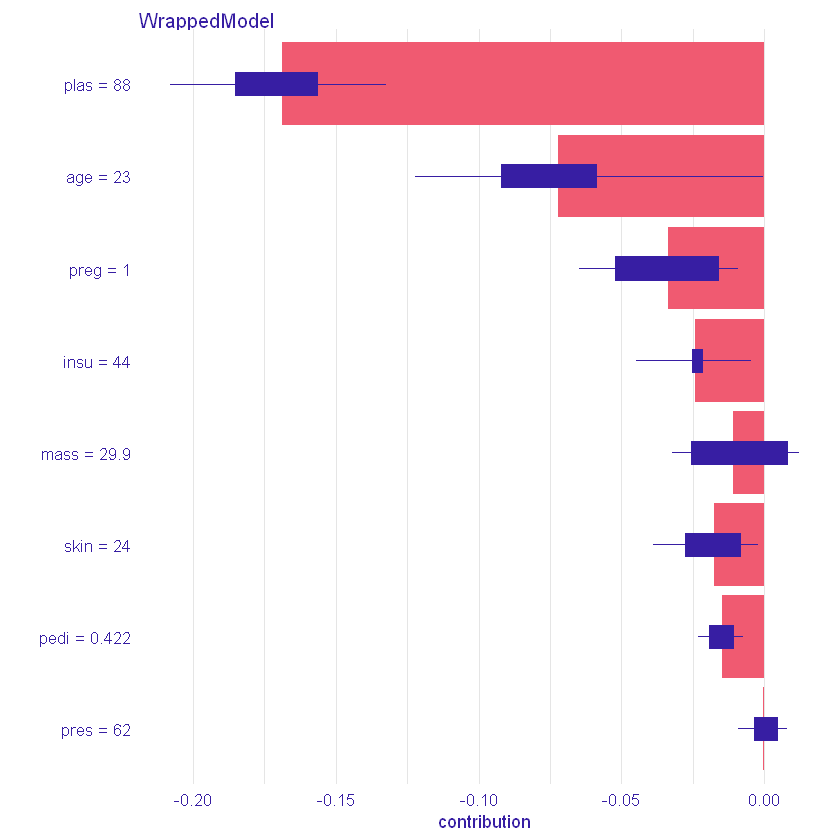

In [11]:
pp_ranger <- predict_parts(explainer, new_observation = r, type = "break_down")
plot(pp_ranger)
pp_ranger <- predict_parts(explainer, new_observation = r, type = "shap", B=10)
plot(pp_ranger)

# wartość zmiennej plas = 88 jak i wiek w okolicy 23 lat, znacząco zmniejszają szansę na to, że dany czlowiek ma cukrzyce

# Znajdź dwie obserwacje ze zbioru danych, które mają dla tych samych zmiennych inne efekty

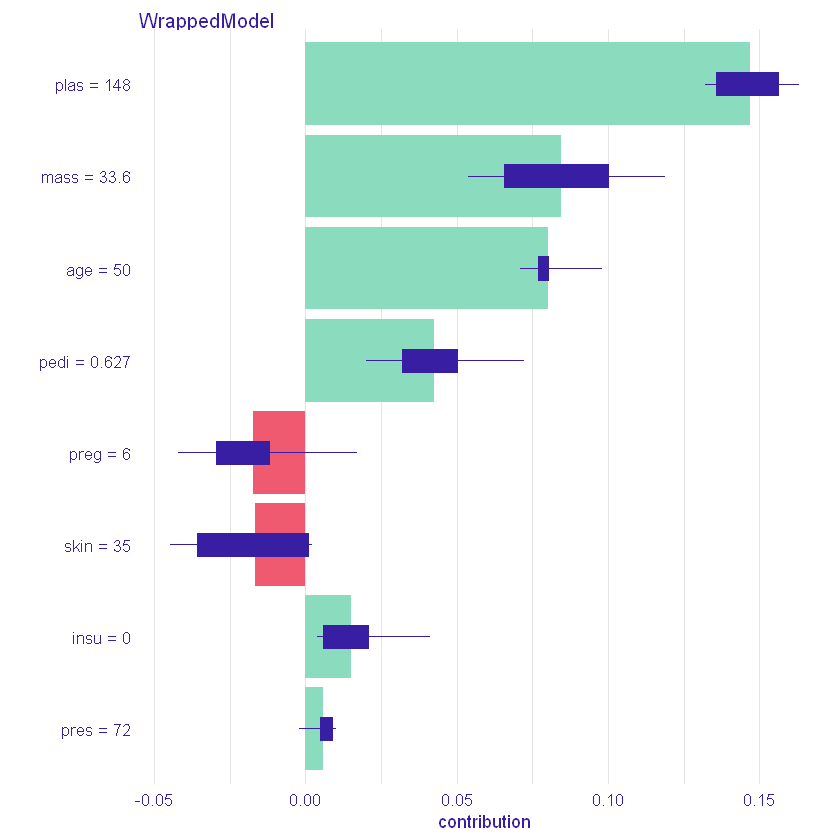

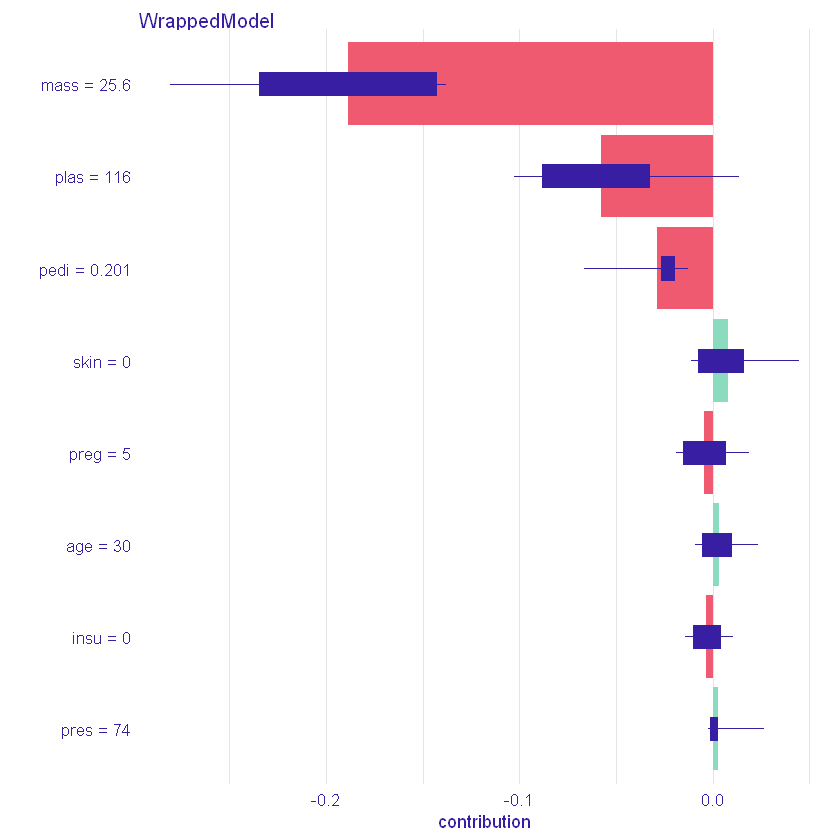

In [12]:
pp_ranger <- predict_parts(explainer, new_observation = test[1,], type = "shap", B=10)
plot(pp_ranger)
pp_ranger <- predict_parts(explainer, new_observation = test[2,], type = "shap", B=10)
plot(pp_ranger)

#mass, plas, pedi, insu, skin wpływają przeciwnie na prawdopodobieństwo wyniku testu w poniższych obserwacjach

# Wybierz dwie obserwacje ze zbioru danych, które mają inne najważniejsze zmienne

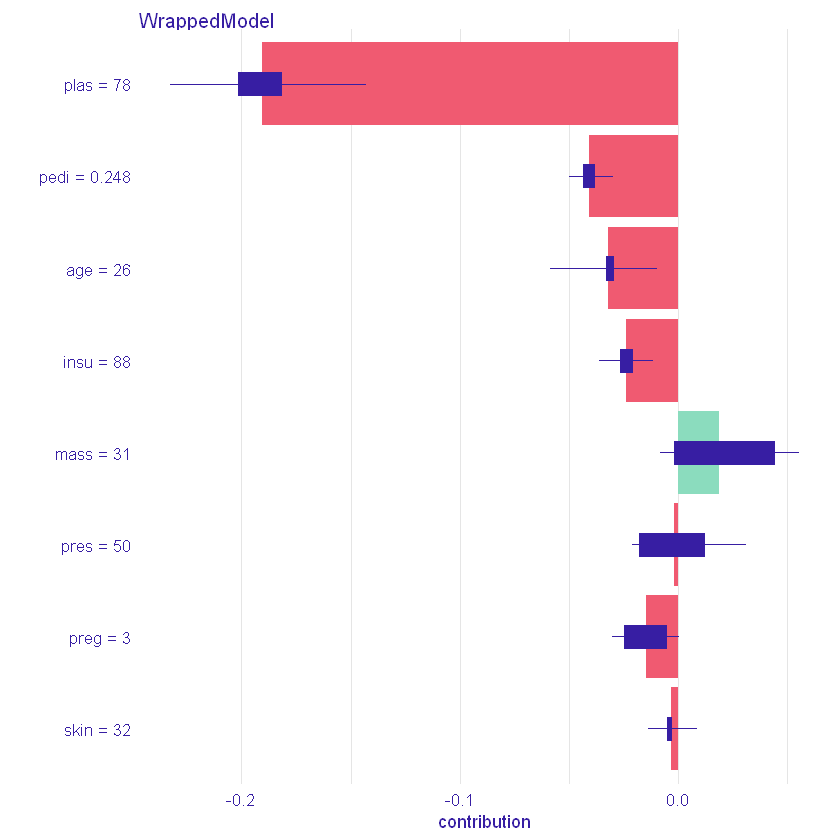

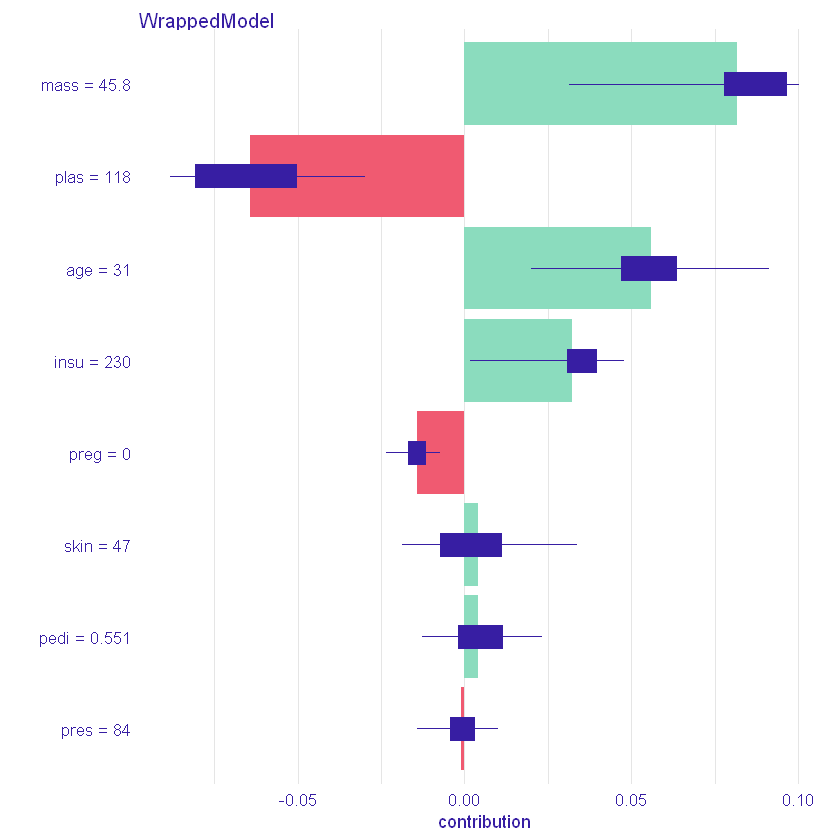

In [13]:
pp_ranger <- predict_parts(explainer, new_observation = test[3,], type = "shap", B=10)
plot(pp_ranger)
pp_ranger <- predict_parts(explainer, new_observation = test[5,], type = "shap", B=10)
plot(pp_ranger)

#zmienne plas, mass i pedi mają znaczącą różnice wielkości wpływu na wynik w tych obserwacjach

In [14]:
#Wpływ zmiennej na predykcję zależy nie tylko od jej wartości ale również od wartości innych zmiennych 